# Final Project: An Analysis of Cardio Disease
The final project aims at doing a data analysis project related to cardio disease. Cardiovascular disease is one of the most fatal diseases for human being in the world. A large number of people die because of heart disease every year. Hence, a model which is able to predict whether an individual has heart disease according to some features is important and meaningful to early detection, treatment, and prevention of cardio disease. In addition, through the models, we might be able to find out the relationship between variables in the dataset and outcome, which helps us estimate how some variables are affecting the cardio disease or how they are associated with cardio disease. 

### Table of Contents

1. Exploratary Data Analysis including depicting some plots group by either gender or some other variables.
2. Analyze the dataset by proposing some hypotheses according to plots and graphs.
3. Test the hypotheses
4. Separate the dataset into training data and test data.
5. Develop the models to predict if an arbitrary patient will get cardio disease.
6. For each model, analyze its properties and characteristics briefly.
7. model comparison and select one by comprehensive consideration

## Exploratory Data Analysis and Data Cleaning

### Data description

source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.


#### Variables

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

#### Outcome

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

### Modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, mean_squared_error, roc_auc_score, classification_report, confusion_matrix
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb




## Data Import & Data Cleaning

In [2]:
# Import data
df = pd.read_csv('cardio_train.csv', sep=';')
# The number of rows
df_count = df.agg('count')
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(f"The number of rows in the dataset: {df_count}")
print("------------------------------------------------------------")
print("The dataset looks like: ")
df.head()



The number of rows in the dataset: id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64
------------------------------------------------------------
The dataset looks like: 


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Delete Outliers
> Luckly, in the dataset, it doesn't have missing values. Through checking the variables one by one, we can find that there are some impossible values in the dataset. For example, some individuals had a 10000 systolic blood pressure or diastolic blood pressure while if someone had a greater 180 blood pressure, he would be possible to take an ambulence at any time. After reading some medical materials, individuals with a 300 blood pressure would get stroke at any time, so we set a bound of 400. The values greater than 400 should be treated as outliers.In addition, some individuals' systolic blood pressure were higher than diastolic, which would be impossible. We will directly delete them because we have 70000 rows in total. It won't be necessary to imputate these outliers. After deleting those outliers, we still have 68703 rows.

In [6]:
# Check the columns
description_ap_hi = df['ap_hi'].describe()
print(description_ap_hi)
print("-----------------------------")
description_ap_lo = df['ap_lo'].describe()
print(description_ap_lo)
print("------------------------------")
summary_df = df.describe(include='all')
summary_df

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64
-----------------------------
count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64
------------------------------


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
conditions = (
    (df['ap_hi'] < df['ap_lo']) |  # ap_hi is less than ap_lo
    (df['ap_hi'] > 400) |  # ap_hi is greater than 400
    (df['ap_hi'] < 30) |  # ap_hi is less than 30
    (df['ap_lo'] > 400) |  # ap_lo is greater than 400
    (df['ap_lo'] < 30)  # ap_lo is less than 30
)

# Identify indexes of rows that meet the conditions
indexes_to_remove = df[conditions].index

# Drop these rows from the DataFrame
df.drop(indexes_to_remove, inplace=True)

df_count = df.agg('count')
print(df_count)

id             68680
age            68680
gender         68680
height         68680
weight         68680
ap_hi          68680
ap_lo          68680
cholesterol    68680
gluc           68680
smoke          68680
alco           68680
active         68680
cardio         68680
dtype: int64


### Dataset modification:
In this case, we know that gender, cholesterol, and gluc are categorical variables. For the ease of following analysis, I am planning to the covert the value of 'gender' into binary where 0 represents female and 1 represents male. Then, for cholesterol and gluc, I am going to make each of the values to become a new created binary variable. For example, cholesterol has 3 values which are 1 : 'normal', 2 : 'above_normal', 3 : 'well_above_normal'. I will change make each of them as a new variable, so there will 'chol_above_normal', 'chol_normal', and 'chol_well_above_normal'. Each patient should be one of the 3 statuses. Hence, each patient will have a value 1 in one of the 3 variables. So is gluc. 

In [5]:
df['gender'] = df['gender'].replace({1 : 0, 2 : 1})
df['cholesterol'] = df['cholesterol'].replace({1 : 'normal', 2 : 'above_normal', 3 : 'well_above_normal'})
df['gluc'] = df['gluc'].replace({1 : 'normal', 2 : 'above_normal', 3 : 'well_above_normal'})

cholesterol_dummies = pd.get_dummies(df['cholesterol'], prefix='chol')
df = pd.concat([df.drop('cholesterol', axis=1), cholesterol_dummies], axis=1)
gluc_dummies = pd.get_dummies(df['gluc'], prefix='gluc')
df = pd.concat([df.drop('gluc', axis=1), gluc_dummies], axis=1)

df['chol_above_normal'] = df['chol_above_normal'].replace({False : 0, True : 1})
df['chol_normal'] = df['chol_normal'].replace({False : 0, True : 1})
df['chol_well_above_normal'] = df['chol_well_above_normal'].replace({False : 0, True : 1})

df['gluc_above_normal'] = df['gluc_above_normal'].replace({False : 0, True : 1})
df['gluc_normal'] = df['gluc_normal'].replace({False : 0, True : 1})
df['gluc_well_above_normal'] = df['gluc_well_above_normal'].replace({False : 0, True : 1})

In [6]:
categorical_columns = ['gender', 'smoke', 'alco', 'active', 'cardio', 'chol_above_normal', 'chol_normal', 'chol_well_above_normal', 'gluc_above_normal', 'gluc_normal', 'gluc_well_above_normal']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [7]:
summary = df.describe(include='all')
summary

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_above_normal,chol_normal,chol_well_above_normal,gluc_above_normal,gluc_normal,gluc_well_above_normal
count,68680.000000,68680.000000,68680.0,68680.000000,68680.000000,68680.000000,68680.000000,68680.0,68680.0,68680.0,68680.0,68680.0,68680.0,68680.0,68680.0,68680.0,68680.0
unique,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
freq,NaN,NaN,44736.0,NaN,NaN,NaN,NaN,62639.0,65016.0,55174.0,34703.0,59377.0,51507.0,60810.0,63613.0,58396.0,63463.0
mean,49974.855839,19464.649884,NaN,164.361299,74.120028,126.673791,81.303436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,28845.299123,2468.167304,NaN,8.183568,14.332786,16.695307,9.466949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,10798.000000,NaN,55.000000,11.000000,60.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25001.500000,17658.000000,NaN,159.000000,65.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50011.000000,19701.500000,NaN,165.000000,72.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,74868.250000,21324.000000,NaN,170.000000,82.000000,140.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Adjust the order

In [8]:
new_order = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender', 'smoke', 'alco', 'active', 'chol_above_normal', \
             'chol_normal', 'chol_well_above_normal', 'gluc_above_normal', 'gluc_normal', 'gluc_well_above_normal', 'cardio']
df = df[new_order]
print("The cleaned dataset looks like: ")
df.head()

The cleaned dataset looks like: 


,age,height,weight,ap_hi,ap_lo,gender,smoke,alco,active,chol_above_normal,chol_normal,chol_well_above_normal,gluc_above_normal,gluc_normal,gluc_well_above_normal,cardio
0,18393,168,62.0,110,80,1,0,0,1,0,1,0,0,1,0,0
1,20228,156,85.0,140,90,0,0,0,1,0,0,1,0,1,0,1
2,18857,165,64.0,130,70,0,0,0,0,0,0,1,0,1,0,1
3,17623,169,82.0,150,100,1,0,0,1,0,1,0,0,1,0,1
4,17474,156,56.0,100,60,0,0,0,0,0,1,0,0,1,0,0


### Correlation Plot
We can check the correlation between variables by correlation plot to check the intuitive level of collinearity. Fortunately, the result was acceptable. There are only some high correlations between the dummy variables from the same categorical variables, such as chol_well_above_normal and chol_normal. The two dummy variables were separated from chol, so it is not strange that there is a high negative correlation between them. Similar to gluc_well_above_normal and gluc_normal.

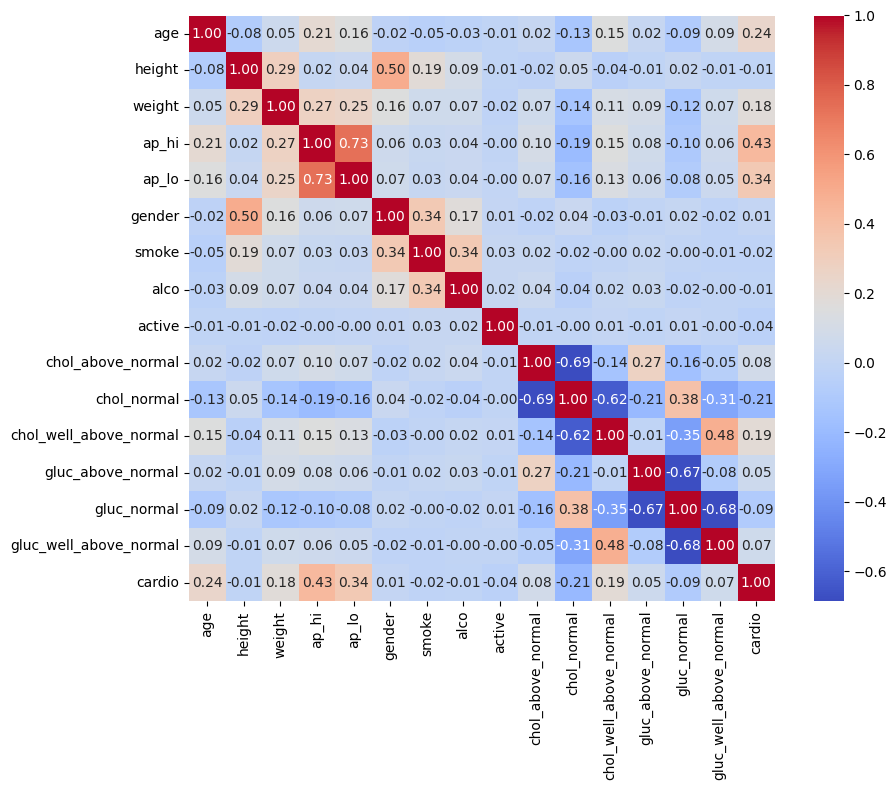

In [9]:
# Assuming 'df' is your DataFrame
corr_matrix = df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
# Adjust layout
plt.tight_layout()
plt.show()

## Continuous Variable

### Feature Plots of the continuous variables
We can see how the continuous variables distribute group by cardio disease. These graphes could provide us some intuitions about whether there is a difference in age, height, weight, systolic blood pressure, and diastolic blood pressure between the case group and control group. From the graph, I would like the propose 4 hypotheses. 

1. There is a difference in age between case group and control group in the dataset.
2. There is a difference in weight between case group and control group in the dataset.
3. There is a difference in systolic blood pressure (ap_hi) between case group and control group in the dataset.
4. There is a difference in diastolic blood pressure (ap_lo) between case group and control group in the dataset.

We can do two sample z-tests to test the hypotheses, because we can calculate the standard deviation and the size of dataset is about 69000. 

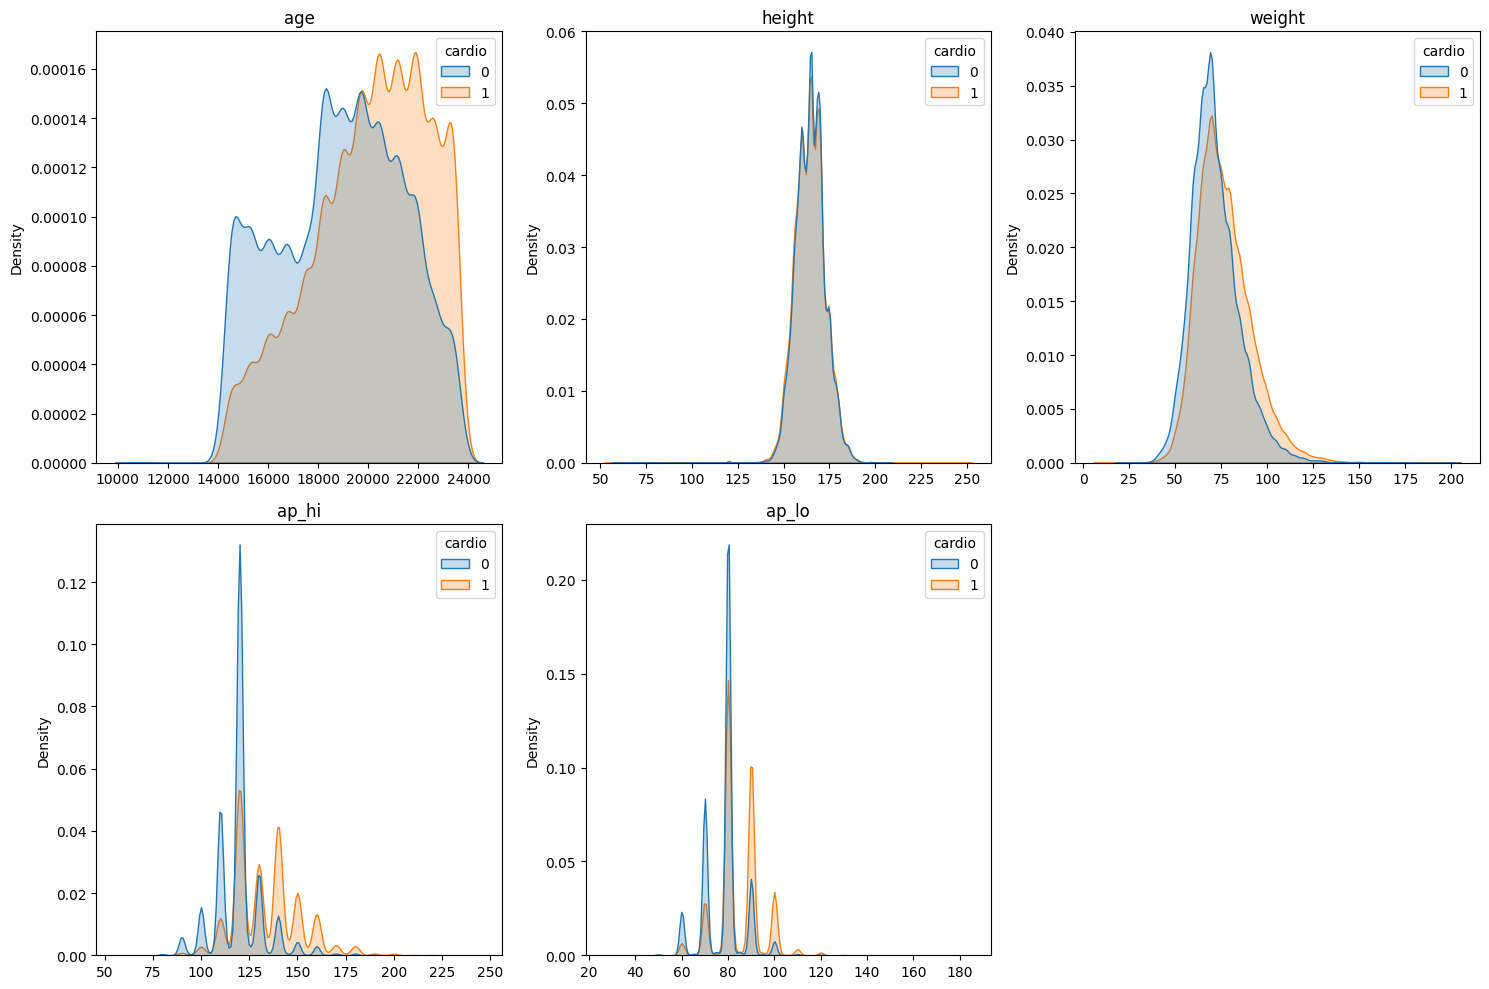

In [10]:
features = df.iloc[:, 0:5]  # This selects 'gender' through 'ap_lo'

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each feature and create a subplot with a density plot
for i, feature in enumerate(features.columns, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid as needed
    # Plotting the density plot for each feature against 'cardio'
    sns.kdeplot(data=df, x=feature, hue='cardio', common_norm=False, fill=True)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Density')
    plt.tight_layout()

plt.show()

### Functions to do two-sample Z test
For the ease of doing the hypothesis tests repeatedly, we can firstly define a function. The arguments include the variable to test, and the significance level with a default value of 0.05.

In [11]:
def continuous_var_hypo_test(varname, significance_level=0.05):
    # Use the variable directly to access the column
    cardio_0_ages = df[df['cardio'] == 0][varname]
    cardio_1_ages = df[df['cardio'] == 1][varname]
    
    mean_0 = cardio_0_ages.mean()
    mean_1 = cardio_1_ages.mean()
    std_0 = cardio_0_ages.std()
    std_1 = cardio_1_ages.std()
    n_0 = len(cardio_0_ages)
    n_1 = len(cardio_1_ages)

    # The formula of Z-score in this case
    Z = (mean_1 - mean_0) / np.sqrt(((std_1**2) / n_1) + ((std_0**2) / n_0))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(Z)))

    print(f"mean0:{mean_0}")
    print(f"mean1:{mean_1}")
    
    print(f"std0:{std_0}")
    print(f"std1:{std_1}")
    
    print(f"n0:{n_0}")
    print(f"n1:{n_1}")
    
    print(f"Z-statistic: {Z}")
    print(f"p-value: {p_value}")
    
    if p_value >= significance_level:
        print(f"With a significance level of {significance_level}, the p-value in this case is {p_value}, which is greater than {significance_level}. Thus, we fail to reject the null hypothesis. There is NO difference between the mean of {varname} grouped by cardio disease.")
    else:
        print(f"With a significance level of {significance_level}, the p-value in this case is {p_value}, which is less than {significance_level}. Thus, we reject the null hypothesis. There is a difference between the mean of {varname} grouped by cardio disease.")

### Hypothesis 1. There is a difference in age between case group and control group in the dataset.

In [12]:
# Null Hypothesis: There is no difference between the mean of age grouped by cardio disease.
# Alternative Hypothesis: There is a difference between the mean of age grouped by cardio disease.

varname = 'age'
continuous_var_hypo_test(varname)

mean0:18880.264501628102
mean1:20061.52205903994
std0:2472.5612066582735
std1:2316.198535871544
n0:34703
n1:33977
Z-statistic: 64.62950529913034
p-value: 0.0
With a significance level of 0.05, the p-value in this case is 0.0, which is less than 0.05. Thus, we reject the null hypothesis. There is a difference between the mean of age grouped by cardio disease.


### Hypothesis 2: There is a difference in weight between case group and control group in the dataset.

In [13]:
# Null Hypothesis: There is no difference between the mean of weigth grouped by cardio disease.
# Alternative Hypothesis: There is a difference between the mean of weight grouped by cardio disease.

varname = 'weight'
continuous_var_hypo_test(varname)

mean0:71.571325245656
mean1:76.72318921623452
std0:13.292515302927178
std1:14.878680622549439
n0:34703
n1:33977
Z-statistic: 47.81951375231704
p-value: 0.0
With a significance level of 0.05, the p-value in this case is 0.0, which is less than 0.05. Thus, we reject the null hypothesis. There is a difference between the mean of weight grouped by cardio disease.


### Hypothesis 3: There is a difference in systolic blood pressure between case group and control group in the dataset.

In [14]:
# Null Hypothesis: There is no difference between the mean of systolic blood pressure grouped by cardio disease.
# Alternative Hypothesis: There is a difference between the mean of systolic blood pressure grouped by cardio disease.

varname = 'ap_hi'
continuous_var_hypo_test(varname)

mean0:119.60349249344436
mean1:133.89516437590135
std0:12.567993917774656
std1:17.288508590977393
n0:34703
n1:33977
Z-statistic: 123.69910047028498
p-value: 0.0
With a significance level of 0.05, the p-value in this case is 0.0, which is less than 0.05. Thus, we reject the null hypothesis. There is a difference between the mean of ap_hi grouped by cardio disease.


### Hypothesis 4: There is a difference in diastolic blood pressure between case group and control group in the dataset.

In [15]:
# Null Hypothesis: There is no difference between the mean of diastolic blood pressure grouped by cardio disease.
# Alternative Hypothesis: There is a difference between the mean of diastolic blood pressure grouped by cardio disease.

varname = 'ap_lo'
continuous_var_hypo_test(varname)

mean0:78.12168976745527
mean1:84.55316831974571
std0:8.16648757663231
std1:9.59927955240972
n0:34703
n1:33977
Z-statistic: 94.48054424654823
p-value: 0.0
With a significance level of 0.05, the p-value in this case is 0.0, which is less than 0.05. Thus, we reject the null hypothesis. There is a difference between the mean of ap_lo grouped by cardio disease.


## Categorical Variables

All the categorical variables have been converted into dummy variables. We can check the frequency of cardio disease in different groups. 
For example, is the frequency of male to get cardio disease statistically significantly higher than female? Let's check these variables one by one and propose some hypotheses. The hypothesis would be tested by Chi-Square Test.

### Gender

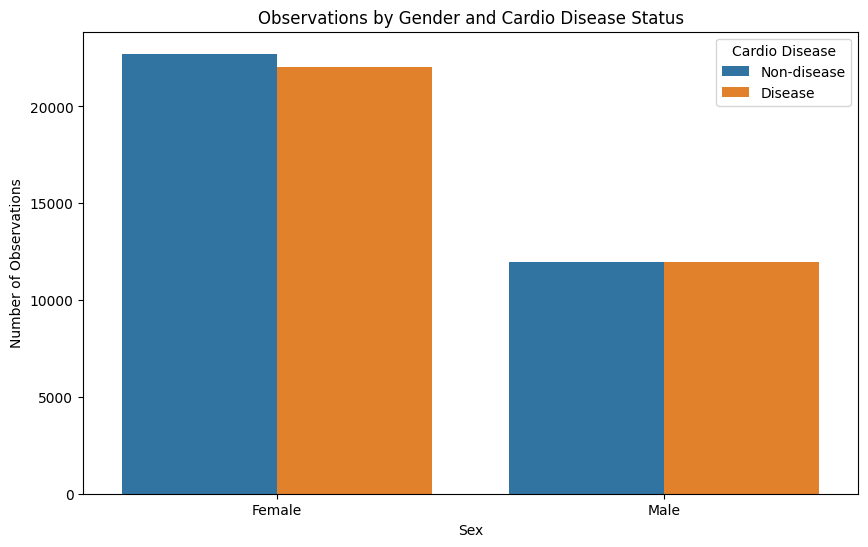

In [16]:
# Plots for the categorical variables
data_plot = df.groupby(['gender', 'cardio']).size().reset_index(name='n_obs')

# Map numeric values to readable categories
data_plot['gender'] = data_plot['gender'].map({0: 'Female', 1: 'Male'})
data_plot['cardio'] = data_plot['cardio'].map({0: 'Non-disease', 1: 'Disease'})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_plot, x='gender', y='n_obs', hue='cardio')
plt.xlabel('Sex')
plt.ylabel('Number of Observations')
plt.title('Observations by Gender and Cardio Disease Status')
plt.legend(title='Cardio Disease')
plt.show()



### Hypothesis 5: The risks to get a cardio disease for male and female are different or not.
> 
> We can conduct a hypothesis test.
> 
> P1 = The number of males who had cardio disease / The total number of males
> 
> P2 = The number of females who had cardio disease / The total number of females
>
> Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
> 
> Null Hypothesis: P1 = P2
> 
> Alternative Hypothesis: P1 != P2

In [17]:
# Rows: Male or Female
# Columns: Cardio or non-Cardio


# Counting the number of males and females
row_counts = df['gender'].map({0: 'Female', 1: 'Male'}).value_counts()

# Displaying the counts
print(row_counts)

# The number of male who has cardio disease
Cell1 = df[(df['gender'] == 1) & (df['cardio'] == 1)].shape[0]
# The number of male who has NOT cardio disease
Cell2 = df[(df['gender'] == 1) & (df['cardio'] == 0)].shape[0]
# The number of female who has cardio disease
Cell3 = df[(df['gender'] == 0) & (df['cardio'] == 1)].shape[0]
# The number of female who has NOT cardio disease
Cell4 = df[(df['gender'] == 0) & (df['cardio'] == 0)].shape[0]

contingency_table = np.array([
    [Cell1, Cell2],  # male
    [Cell3, Cell4]  # female
])

# Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

gender
Female    44736
Male      23944
Name: count, dtype: int64
Degrees of freedom: 1
Expected frequencies: [[11845.44682586 12098.55317414]
 [22131.55317414 22604.44682586]]
Chi-square statistic: 3.4546098099834164
p-value: 0.06307562078207285


Test Result: In this case, when the significance level is 0.05, the p-value was 0.0631 which was greater than 0.05, we failed to reject the null hypothesis. This implied that there was not enough statistical evidence to conclude that there is a significant difference between the observed frequencies of male and female.

### Smoking

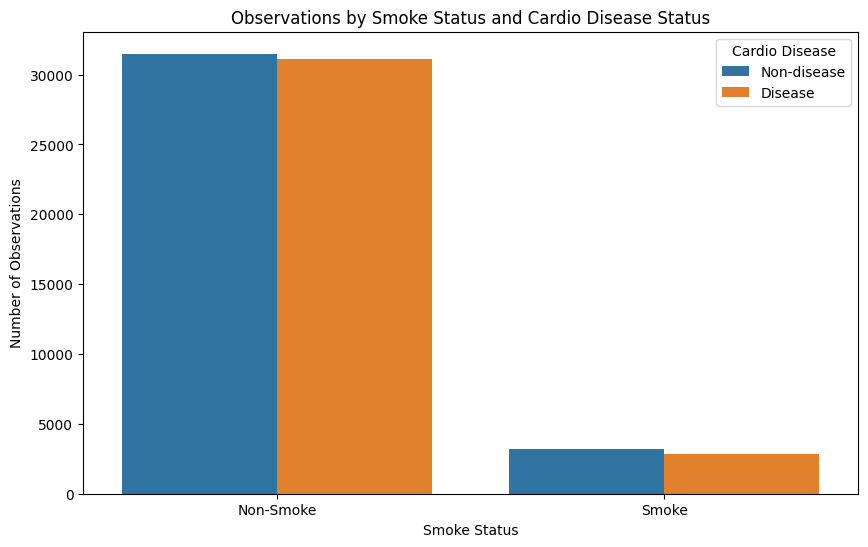

In [18]:
# Plots for the categorical variables
data_plot = df.groupby(['smoke', 'cardio']).size().reset_index(name='n_obs')

# Map numeric values to readable categories
data_plot['smoke'] = data_plot['smoke'].map({0: 'Non-Smoke', 1: 'Smoke'})
data_plot['cardio'] = data_plot['cardio'].map({0: 'Non-disease', 1: 'Disease'})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_plot, x='smoke', y='n_obs', hue='cardio')
plt.xlabel('Smoke Status')
plt.ylabel('Number of Observations')
plt.title('Observations by Smoke Status and Cardio Disease Status')
plt.legend(title='Cardio Disease')
plt.show()

### Hypothesis 6: The risks to get a cardio disease for people who smoked and people who did NOT smoke or not.
> 
> We can conduct a hypothesis test.
> 
> P1 = The number of smoking people who had cardio disease / The total number of smoking people
> 
> P2 = The number of non-smoking who had cardio disease / The total number of non-smoking people
>
> Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
> 
> Null Hypothesis: P1 = P2
> 
> Alternative Hypothesis: P1 != P2

In [19]:
# Rows: Smoking or Non-smoking
# Columns: Cardio or non-Cardio


# Counting the number
row_counts = df['smoke'].map({0: 'non-smoking', 1: 'smoking'}).value_counts()

# Displaying the counts
print(row_counts)

# The number of smoking who has cardio disease
Cell1 = df[(df['smoke'] == 1) & (df['cardio'] == 1)].shape[0]
# The number of smoking who has NOT cardio disease
Cell2 = df[(df['smoke'] == 1) & (df['cardio'] == 0)].shape[0]
# The number of non-smoking who has cardio disease
Cell3 = df[(df['smoke'] == 0) & (df['cardio'] == 1)].shape[0]
# The number of non-smoking who has NOT cardio disease
Cell4 = df[(df['smoke'] == 0) & (df['cardio'] == 0)].shape[0]

contingency_table = np.array([
    [Cell1, Cell2],  # smoke
    [Cell3, Cell4]  # non-smoke
])

# Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

smoke
non-smoking    62639
smoking         6041
Name: count, dtype: int64
Degrees of freedom: 1
Expected frequencies: [[ 2988.57101048  3052.42898952]
 [30988.42898952 31650.57101048]]
Chi-square statistic: 18.14218606128201
p-value: 2.0500891694693757e-05


Test Result: In this case, when the significance level is 0.05, the p-value was 2.0500891694693757e-05 which was less than 0.05, we rejected the null hypothesis. This implied that there were sufficient statistical evidences to conclude that there is a significant difference between the observed frequencies of smoking people and non-smoling people.

### Alcohol intake

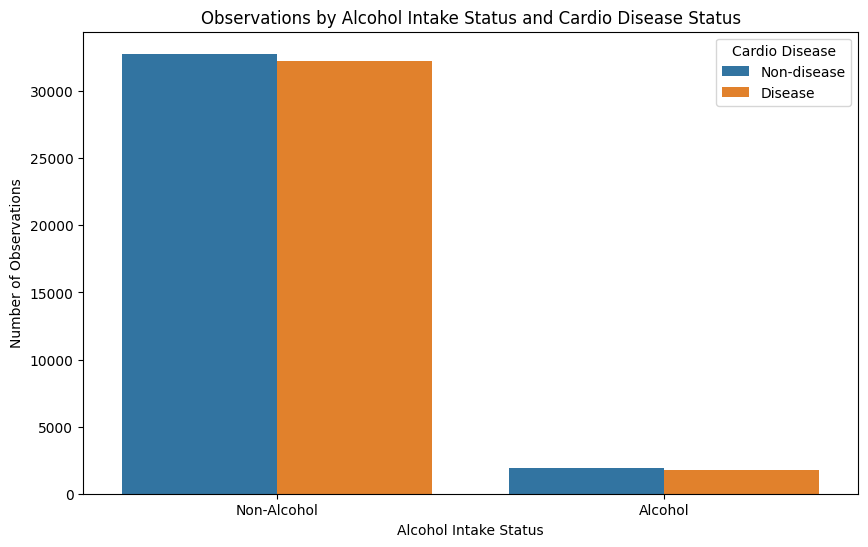

In [20]:
# Plots for the categorical variables
data_plot = df.groupby(['alco', 'cardio']).size().reset_index(name='n_obs')

# Map numeric values to readable categories
data_plot['alco'] = data_plot['alco'].map({0: 'Non-Alcohol', 1: 'Alcohol'})
data_plot['cardio'] = data_plot['cardio'].map({0: 'Non-disease', 1: 'Disease'})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_plot, x='alco', y='n_obs', hue='cardio')
plt.xlabel('Alcohol Intake Status')
plt.ylabel('Number of Observations')
plt.title('Observations by Alcohol Intake Status and Cardio Disease Status')
plt.legend(title='Cardio Disease')
plt.show()

### Hypothesis 7: The risks to get a cardio disease for people who drink and people who did NOT drink or not.
> 
> We can conduct a hypothesis test.
> 
> P1 = The number of drinking people who had cardio disease / The total number of drinking people
> 
> P2 = The number of non-drinking who had cardio disease / The total number of non-drinking people
>
> Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
> 
> Null Hypothesis: P1 = P2
> 
> Alternative Hypothesis: P1 != P2

In [21]:
# Rows: Alcohol Intake or Non-alcohol Intake
# Columns: Cardio or non-Cardio


# Counting the number
row_counts = df['alco'].map({0: 'non-alcohol', 1: 'alcohol'}).value_counts()

# Displaying the counts
print(row_counts)

# The number of drinking people who has cardio disease
Cell1 = df[(df['alco'] == 1) & (df['cardio'] == 1)].shape[0]
# The number of drinking people who has NOT cardio disease
Cell2 = df[(df['alco'] == 1) & (df['cardio'] == 0)].shape[0]
# The number of drinking who has cardio disease
Cell3 = df[(df['alco'] == 0) & (df['cardio'] == 1)].shape[0]
# The number of drinking who has NOT cardio disease
Cell4 = df[(df['alco'] == 0) & (df['cardio'] == 0)].shape[0]

contingency_table = np.array([
    [Cell1, Cell2],  # drink
    [Cell3, Cell4]  # non-drink
])

# Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

alco
non-alcohol    65016
alcohol         3664
Name: count, dtype: int64
Degrees of freedom: 1
Expected frequencies: [[ 1812.63436226  1851.36563774]
 [32164.36563774 32851.63436226]]
Chi-square statistic: 5.198198178442027
p-value: 0.02261031360631255


Test Result: In this case, when the significance level is 0.05, when the significance level is 0.05, the p-value was 0.0226 which was less than 0.05, we rejected the null hypothesis. This implied that there were sufficient statistical evidences to conclude that there is a significant difference between the observed frequencies of people who drink alcohol and people who did NOT drink alcohol.

### Physical activity

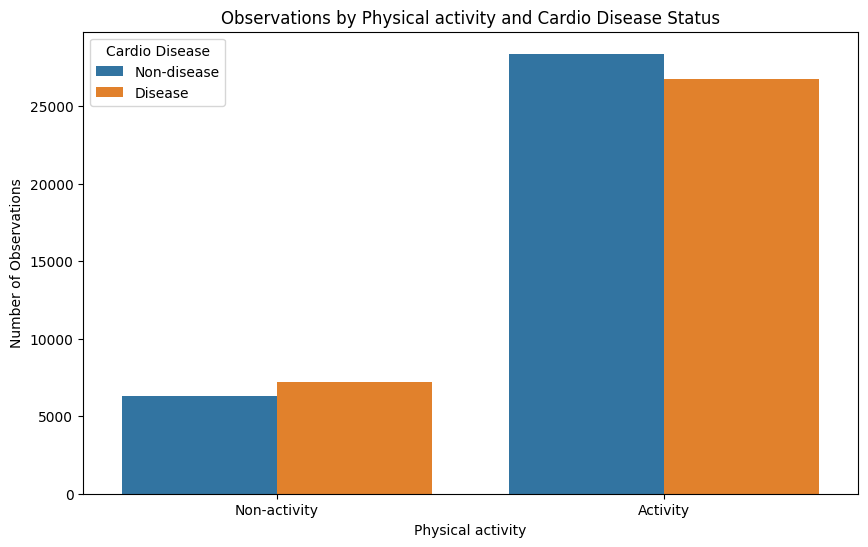

In [22]:
# Plots for the categorical variables
data_plot = df.groupby(['active', 'cardio']).size().reset_index(name='n_obs')

# Map numeric values to readable categories
data_plot['active'] = data_plot['active'].map({0: 'Non-activity', 1: 'Activity'})
data_plot['cardio'] = data_plot['cardio'].map({0: 'Non-disease', 1: 'Disease'})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_plot, x='active', y='n_obs', hue='cardio')
plt.xlabel('Physical activity')
plt.ylabel('Number of Observations')
plt.title('Observations by Physical activity and Cardio Disease Status')
plt.legend(title='Cardio Disease')
plt.show()

### Hypothesis 8: The risks to get a cardio disease for people who worked out and people who did NOT worked out.
> 
> We can conduct a hypothesis test.
> 
> P1 = The number of work out people who had cardio disease / The total number of work out people
> 
> P2 = The number of non-workout people who had cardio disease / The total number of non-workout people
>
> Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
> 
> Null Hypothesis: P1 = P2
> 
> Alternative Hypothesis: P1 != P2

In [23]:
# Rows: Workout or Non-work out
# Columns: Cardio or non-Cardio


# Counting the number
row_counts = df['active'].map({0: 'non-active', 1: 'active'}).value_counts()

# Displaying the counts
print(row_counts)

# The number of people who did work out with cardio disease
Cell1 = df[(df['active'] == 1) & (df['cardio'] == 1)].shape[0]
# The number of drinking people who did work out without cardio disease
Cell2 = df[(df['active'] == 1) & (df['cardio'] == 0)].shape[0]
# The number of people who did NOT work out with cardio disease
Cell3 = df[(df['active'] == 0) & (df['cardio'] == 1)].shape[0]
# The number of drinking people who did NOT work out without cardio disease
Cell4 = df[(df['active'] == 0) & (df['cardio'] == 0)].shape[0]

contingency_table = np.array([
    [Cell1, Cell2],  # work-out
    [Cell3, Cell4]  # non-work-out
])

# Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

active
active        55174
non-active    13506
Name: count, dtype: int64
Degrees of freedom: 1
Expected frequencies: [[27295.38436226 27878.61563774]
 [ 6681.61563774  6824.38436226]]
Chi-square statistic: 96.23273127567381
p-value: 1.0214220956360133e-22


Test Result: In this case, when the significance level is 0.05, the p-value was 1.0214220956360133e-22 which was less than 0.05, we rejected the null hypothesis. This implied that there were sufficient statistical evidences to conclude that there is a significant difference between the observed frequencies of people who did work out and people who did NOT work out.

### Cholesterol (Well above Normal)

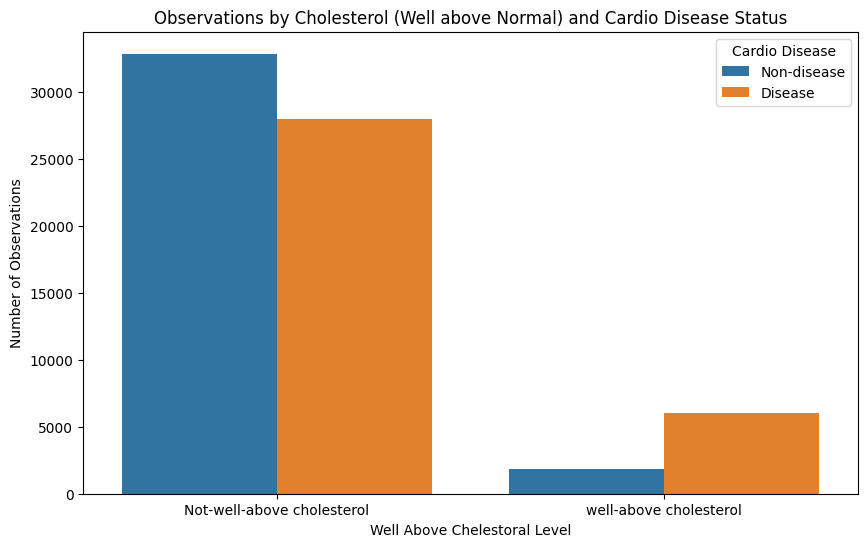

In [24]:
# Plots for the categorical variables
data_plot = df.groupby(['chol_well_above_normal', 'cardio']).size().reset_index(name='n_obs')

# Map numeric values to readable categories
data_plot['chol_well_above_normal'] = data_plot['chol_well_above_normal'].map({0: 'Not-well-above cholesterol', 1: 'well-above cholesterol'})
data_plot['cardio'] = data_plot['cardio'].map({0: 'Non-disease', 1: 'Disease'})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_plot, x='chol_well_above_normal', y='n_obs', hue='cardio')
plt.xlabel('Well Above Chelestoral Level')
plt.ylabel('Number of Observations')
plt.title('Observations by Cholesterol (Well above Normal) and Cardio Disease Status')
plt.legend(title='Cardio Disease')
plt.show()

### Hypothesis 9: The risks to get a cardio disease for people whose cholesterol level were well above normal and people whose cholesteral level were NOT well above normal.
> 
> We can conduct a hypothesis test.
> 
> P1 = The number of people whose cholesterol level were well above normal had cardio disease / The total number of people with a well above normal level of cholesterol
> 
> P2 = The number of people whose cholesterol level were NOT well above normal had cardio disease / The total number of people with NOT a well above normal level of cholesterol
>
> Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
> 
> Null Hypothesis: P1 = P2
> 
> Alternative Hypothesis: P1 != P2

In [26]:
# Counting the number
row_counts = df['chol_well_above_normal'].map({0: 'Not-well-above', 1: 'well-above'}).value_counts()

# Displaying the counts
print(row_counts)

# The number of well-above-normal cholesterol people who has cardio disease
Cell1 = df[(df['chol_well_above_normal'] == 1) & (df['cardio'] == 1)].shape[0]
# The number of well-above-normal cholesterol people who has NOT cardio disease
Cell2 = df[(df['chol_well_above_normal'] == 1) & (df['cardio'] == 0)].shape[0]
# The number of non-well-above-normal cholesterol who has cardio disease
Cell3 = df[(df['chol_well_above_normal'] == 0) & (df['cardio'] == 1)].shape[0]
# The number of non-well-above-normal cholesterol who has NOT cardio disease
Cell4 = df[(df['chol_well_above_normal'] == 0) & (df['cardio'] == 0)].shape[0]

contingency_table = np.array([
    [Cell1, Cell2],  # well above normal cholesterol
    [Cell3, Cell4]  # non-well-above-normal cholesterol
])

# Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

chol_well_above_normal
Not-well-above    60810
well-above         7870
Name: count, dtype: int64
Degrees of freedom: 1
Expected frequencies: [[ 3893.40404776  3976.59595224]
 [30083.59595224 30726.40404776]]
Chi-square statistic: 2548.928767984041
p-value: 0.0


Test Result: In this case, when the significance level is 0.05, the p-value was 0.0 which was less than 0.05, we rejected the null hypothesis. This implied that there were sufficient statistical evidences to conclude that there is a significant difference between the observed frequencies of people whose cholesterol level were well above normal and people without a well above normal level of cholesterol.

### Glucose (Well above Normal)¶

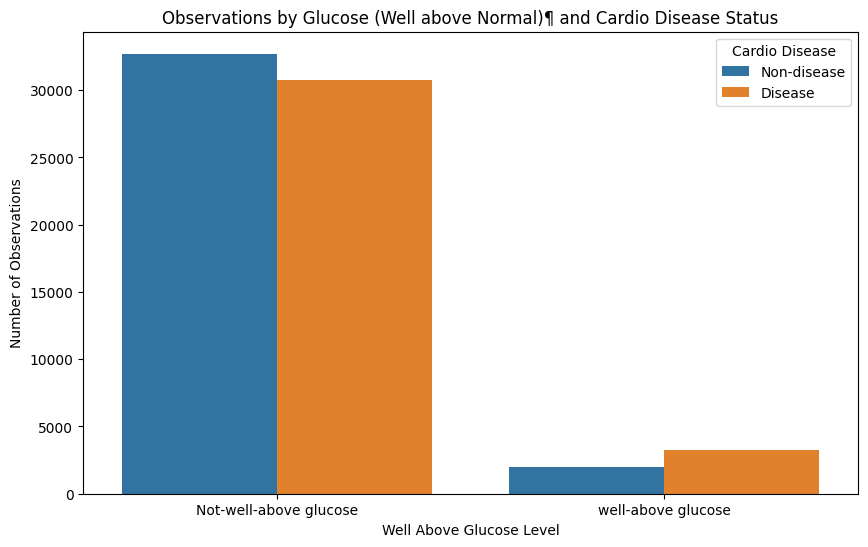

In [27]:
# Plots for the categorical variables
data_plot = df.groupby(['gluc_well_above_normal', 'cardio']).size().reset_index(name='n_obs')

# Map numeric values to readable categories
data_plot['gluc_well_above_normal'] = data_plot['gluc_well_above_normal'].map({0: 'Not-well-above glucose', 1: 'well-above glucose'})
data_plot['cardio'] = data_plot['cardio'].map({0: 'Non-disease', 1: 'Disease'})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_plot, x='gluc_well_above_normal', y='n_obs', hue='cardio')
plt.xlabel('Well Above Glucose Level')
plt.ylabel('Number of Observations')
plt.title('Observations by Glucose (Well above Normal)¶ and Cardio Disease Status')
plt.legend(title='Cardio Disease')
plt.show()

### Hypothesis 10: The risks to get a cardio disease for people whose glucose level were well above normal and people whose glucose level were NOT well above normal.
> 
> We can conduct a hypothesis test.
> 
> P1 = The number of people whose glucose level were well above normal had cardio disease / The total number of people with a well above normal level of glucose
> 
> P2 = The number of people whose glucose level were NOT well above normal had cardio disease / The total number of people with NOT a well above normal level of glucose
>
> Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
> 
> Null Hypothesis: P1 = P2
> 
> Alternative Hypothesis: P1 != P2

In [28]:
# Counting the number
row_counts = df['gluc_well_above_normal'].map({0: 'Not-well-above', 1: 'well-above'}).value_counts()

# Displaying the counts
print(row_counts)

# The number of well-above-normal glucose people who has cardio disease
Cell1 = df[(df['gluc_well_above_normal'] == 1) & (df['cardio'] == 1)].shape[0]
# The number of well-above-normal glucose people who has NOT cardio disease
Cell2 = df[(df['gluc_well_above_normal'] == 1) & (df['cardio'] == 0)].shape[0]
# The number of non-well-above-normal glucose who has cardio disease
Cell3 = df[(df['gluc_well_above_normal'] == 0) & (df['cardio'] == 1)].shape[0]
# The number of non-well-above-normal glucose who has NOT cardio disease
Cell4 = df[(df['gluc_well_above_normal'] == 0) & (df['cardio'] == 0)].shape[0]

contingency_table = np.array([
    [Cell1, Cell2],  # well-above-normal glucose
    [Cell3, Cell4]  # non-well-above-normal glucose
])

# Yates-Corrected Chi-Square Test for a 2x2 Contingency Table
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

gluc_well_above_normal
Not-well-above    63463
well-above         5217
Name: count, dtype: int64
Degrees of freedom: 1
Expected frequencies: [[ 2580.92616482  2636.07383518]
 [31396.07383518 32066.92616482]]
Chi-square statistic: 340.51462175648646
p-value: 4.9294150350283194e-76


Test Result: In this case, when the significance level is 0.05, the p-value was 4.9294150350283194e-76 which was less than 0.05, we rejected the null hypothesis. This implied that there were sufficient statistical evidences to conclude that there is a significant difference between the observed frequencies of people whose glucose level were well above normal and people without a well above normal level of glucose.

## Model Trainning for Prediction

### 1. Dataset Separation
> We are going to separate the whole dataset into trainning dataset (70%) and test dataset (30%). Then, all the following models will be trained by using the trainning dataset. And we will check the accuracy of the model by using the test dataset. 

In [29]:
# Set the random seed for reproducibility
np.random.seed(2022)

X = df.drop('cardio', axis=1)  # Features
y = df['cardio']  # Target variable

# Separate the dataset into training dataset (70%) and test dataset (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Performance functions
> To check the performance of models, we are going to define two functions to generate the performance of the models including Accuracy, Confusion Matrix.

> 1. training_model_performance(training_model, X_train_scaled, y_train): This function is to check the performance of models using trainning dataset. The inputs are the model to check, variable dataset to apply, and outcome dataset to apply. The function will print accuracy, classification report, confusion matrix, and Cross-validation Accuracy Scores. 

> 2. testing_model_performance(test_model, X_test_scaled, y_test): This function is to check the performance of models using test dataset. The inputs are the model to check, variable dataset to apply, and outcome dataset to apply. The function will print accuracy, classification report, confusion matrix, AUC Score, and log loss. 

In [30]:
def training_model_performance(training_model, X_train_scaled, y_train):
    y_train_pred = training_model.predict(X_train_scaled)
    #y_train_pred_proba = training_model.predict_proba(X_train_scaled)[:, 1]
    
    # Accuracy of prediction
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {train_accuracy}')
    
    
    # Model evaluation
    print("Classification Report (Training Data):")
    print(classification_report(y_train, y_train_pred))
    
    # Confusion Matrix
    print("Confusion Matrix (Training Data):")
    # Extract TN, FP, FN, TP
    cm = confusion_matrix(y_train, y_train_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Print the formatted confusion matrix
    print(f"True Negative (TN): {TN}  False Positive (FP): {FP}")
    print(f"False Negative (FN): {FN}  True Positive (TP): {TP}")
    
    # Perform cross-validation
    cv_scores = cross_val_score(training_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    print("Cross-validation Accuracy Scores:", cv_scores)
    print("Mean CV Accuracy:", cv_scores.mean())



def testing_model_performance(test_model, X_test_scaled, y_test):
    # Predict on the test data
    y_test_pred = test_model.predict(X_test_scaled)
    y_test_pred_proba = test_model.predict_proba(X_test_scaled)[:, 1]
    
    # Test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Test Accuracy: {test_accuracy}')
    
    # Model evaluation
    print("Classification Report (Test Data):")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion Matrix
    print("Confusion Matrix (Test Data):")
    
    # Extract TN, FP, FN, TP
    cm_test = confusion_matrix(y_test, y_test_pred)
    TN2, FP2, FN2, TP2 = cm_test.ravel()
    
    # Print the formatted confusion matrix
    print(f"True Negative (TN): {TN2}  False Positive (FP): {FP2}")
    print(f"False Negative (FN): {FN2}  True Positive (TP): {TP2}")
    
    
    # ROC AUC Score
    print("ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
    
    # Log Loss
    print("Log Loss:", log_loss(y_test, y_test_pred_proba))




### Model1: Logistic Regression

The first model I tried was logistic regression model. Logistic Regression is a statistical model used primarily for binary classification problems, where the goal is to predict one of two possible outcomes given a set of input features. Despite its name suggesting it's a type of regression, it's used for classification tasks because it predicts the probability that a given input belongs to a particular category. Compared with some other complicated models, it is easy to be interpreted, which allows us to know more about the effect of variables to the outcome. 

In [31]:
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
# If it is scaled features, use X_train_scaled instead of X_train
log_reg.fit(X_train_scaled, y_train)

# Coefficients and intercept
print("Intercept:", log_reg.intercept_)
print("Coefficients:", log_reg.coef_)

training_model_performance(log_reg, X_train_scaled, y_train)

Intercept: [0.03028935]
Coefficients: [[ 0.34211039 -0.02471649  0.15156335  0.95294916  0.09758049 -0.01629931
  -0.03741303 -0.05650886 -0.09086887  0.00441356 -0.16047452  0.21359482
   0.02560959  0.02481762 -0.05885592]]
Training Accuracy: 0.7284715866544638
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     24292
           1       0.76      0.67      0.71     23784

    accuracy                           0.73     48076
   macro avg       0.73      0.73      0.73     48076
weighted avg       0.73      0.73      0.73     48076

Confusion Matrix (Training Data):
True Negative (TN): 19164  False Positive (FP): 5128
False Negative (FN): 7926  True Positive (TP): 15858
Cross-validation Accuracy Scores: [0.72847338 0.72615705 0.73395736 0.7224129  0.73270931]
Mean CV Accuracy: 0.7287419974336411


In [32]:
# Predict on the test data
testing_model_performance(log_reg, X_test_scaled, y_test)

Test Accuracy: 0.726703552708212
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10411
           1       0.75      0.67      0.71     10193

    accuracy                           0.73     20604
   macro avg       0.73      0.73      0.73     20604
weighted avg       0.73      0.73      0.73     20604

Confusion Matrix (Test Data):
True Negative (TN): 8152  False Positive (FP): 2259
False Negative (FN): 3372  True Positive (TP): 6821
ROC AUC Score: 0.7915962439752842
Log Loss: 0.5604088889993657


The accuracy of the model apply the test dataset was 0.7267 which was pretty close to the accuracy when the model was applying the training dataset. There was a drawback. On the confusion matrix, we can see that the false negative was even higher than the false positive. For a disease, the type 2 error would be even more horrible than the type 1 error, because it would make patients underestimate the risk they were actually facing. For the models to predict the if someone has got a disease, eliminating type 2 error is also one of the most important properties. The AUC score here was 0.7974.

### Model2: Linear Discriminant Analysis (LDA)

The second model I tried was the linear discriminant analysis. Linear Discriminant Analysis (LDA) is a statistical method used for dimensionality reduction and as a classification technique. It is particularly useful in the fields of pattern recognition, machine learning, and statistics. LDA aims to find a linear combination of features that best separates two or more classes of objects or events. The resulting combination can be used as a linear classifier or for dimensionality reduction before further classification.

In [33]:
# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to scaled training data
lda.fit(X_train_scaled, y_train)

# Coefficients and intercept
print("Intercept:", lda.intercept_)
print("Coefficients:", lda.coef_)

training_model_performance(lda, X_train_scaled, y_train)

Intercept: [-0.02740669]
Coefficients: [[ 0.35952415 -0.02877525  0.15528001  0.860155    0.11156294 -0.01705796
  -0.03483161 -0.05574714 -0.09098925  0.01328379 -0.16197276  0.20438464
   0.02075699  0.02196815 -0.05016656]]
Training Accuracy: 0.726828355104418
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     24292
           1       0.76      0.65      0.70     23784

    accuracy                           0.73     48076
   macro avg       0.73      0.73      0.73     48076
weighted avg       0.73      0.73      0.73     48076

Confusion Matrix (Training Data):
True Negative (TN): 19376  False Positive (FP): 4916
False Negative (FN): 8217  True Positive (TP): 15567
Cross-validation Accuracy Scores: [0.72784942 0.725013   0.73177327 0.7201248  0.72896516]
Mean CV Accuracy: 0.7267451305373347


LDA supposed that predictors followed a potential normal distribution and classified data points into groups with the maximum likelihood. Here the training accuracy was 0.7268. There are 2 classes in our data, thus the reduced dimension should be 1. Coefficients for height, and gender were slightly negative, which meant that the males had the less probability of cardio disease compared with female. In the previous hypothesis test, we also found the difference was not statistically significant. 

In [34]:
testing_model_performance(lda, X_test_scaled, y_test)

Test Accuracy: 0.7248107163657542
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10411
           1       0.75      0.66      0.70     10193

    accuracy                           0.72     20604
   macro avg       0.73      0.72      0.72     20604
weighted avg       0.73      0.72      0.72     20604

Confusion Matrix (Test Data):
True Negative (TN): 8238  False Positive (FP): 2173
False Negative (FN): 3497  True Positive (TP): 6696
ROC AUC Score: 0.791133774006455
Log Loss: 0.560721550484193


The accuracy of LDA model applying to the test dataset was 0.7248, which was nice. And the AUC score was 0.7911. Similar to the model above, its type 2 error was also greater than type 1 error in the confusion matrix.

### Extreme Gradient Boosting

The third model built was the extreme gradient boosting. Extreme Gradient Boosting, commonly known as XGBoost, is a highly efficient and scalable implementation of gradient boosted trees designed for speed and performance. It is an advanced and more efficient version of Gradient Boosting Machine (GBM) and has gained popularity in data science and machine learning competitions for its performance in classification, regression, and ranking tasks.

In [35]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Fit the model to the training data
xgb_clf.fit(X_train_scaled, y_train)

# Coefficients and intercept
print("Feature Importances:", xgb_clf.feature_importances_)


training_model_performance(xgb_clf, X_train_scaled, y_train)

Feature Importances: [0.04159307 0.0180213  0.02025751 0.40552968 0.02378304 0.02182564
 0.0307047  0.02979682 0.03386392 0.0341527  0.06716941 0.18402208
 0.0227006  0.02578138 0.04079814]
Training Accuracy: 0.7716532157417423
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78     24292
           1       0.80      0.73      0.76     23784

    accuracy                           0.77     48076
   macro avg       0.77      0.77      0.77     48076
weighted avg       0.77      0.77      0.77     48076

Confusion Matrix (Training Data):
True Negative (TN): 19852  False Positive (FP): 4440
False Negative (FN): 6538  True Positive (TP): 17246
Cross-validation Accuracy Scores: [0.72608153 0.72730109 0.73270931 0.72459698 0.72938118]
Mean CV Accuracy: 0.7280140180648824


According to the result of the training model, the extreme gradient boosting model generated an acceptable accuracy 0.7717. And the accuracy scores in the 5-fold cross-validation were stable, which just fluctuated between 0.72 and 0.73. It did not overfit the training dataset. According to the feature importance list, the systolic blood presure (0.40552968) and cholesterol_well_above_normal (0.18402208) were the two most important features.

In [36]:
testing_model_performance(xgb_clf, X_test_scaled, y_test)

Test Accuracy: 0.7268491555037857
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10411
           1       0.74      0.69      0.71     10193

    accuracy                           0.73     20604
   macro avg       0.73      0.73      0.73     20604
weighted avg       0.73      0.73      0.73     20604

Confusion Matrix (Test Data):
True Negative (TN): 7979  False Positive (FP): 2432
False Negative (FN): 3196  True Positive (TP): 6997
ROC AUC Score: 0.793909814143839
Log Loss: 0.5526576849585326


The accuracy of the model applying to the test dataset was 0.7268 which was pretty close to the accuracy when the model was being applied to the training dataset. Similar to the logistic regression model, on the confusion matrix, we can see that the false negative was even higher than the false positive. The AUC score in this case was 0.7939.

### Classification Tree
The fourth model was Classification tree. A Classification Tree is a type of decision tree that is used for separating the dataset into classes based on the features. It repeatly splits the data into distinct branches, which represent decision nodes where choices are made based on the values of the input features. Each leaf node of the tree represents a class label. The objective of a classification tree is to make as pure a node as possible, with minimal impurity meaning that the node contains data points that belong mostly to a single class. Classification trees are intuitive and easy to understand, making them a popular choice for a wide range of applications. However, they can be prone to overfitting, especially with complex trees, which might necessitate pruning strategies to generalize better to unseen data.

In [37]:
# Initialize the Classification Tree model
clf_tree = DecisionTreeClassifier(random_state=42)

# Fit the model
clf_tree.fit(X_train_scaled, y_train)

print("Feature Importances:", clf_tree.feature_importances_)

training_model_performance(clf_tree, X_train_scaled, y_train)

Feature Importances: [0.32116984 0.14468001 0.15966516 0.23023958 0.03966484 0.01943307
 0.00757165 0.00735749 0.01461624 0.00747745 0.00601505 0.02002309
 0.00710077 0.00794798 0.00703778]
Training Accuracy: 0.9998335968050587
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24292
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     48076
   macro avg       1.00      1.00      1.00     48076
weighted avg       1.00      1.00      1.00     48076

Confusion Matrix (Training Data):
True Negative (TN): 24292  False Positive (FP): 0
False Negative (FN): 8  True Positive (TP): 23776
Cross-validation Accuracy Scores: [0.63571131 0.63764951 0.62776911 0.63286531 0.63411336]
Mean CV Accuracy: 0.6336217220735418


A training accuracy of almost 100% suggests that the model has almost perfectly classified every instance in the training set. While this might seem desirable at first glance, it's often a sign that the model is too complex and has memorized the training data rather than learning the underlying patterns. Then, we use cross-validation to provide a more realistic evaluation of the model's performance on unseen data by splitting the dataset into multiple train-test folds. The lower cross-validation scores compared to the training score indicate that the model's performance drops when it encounters new data, which is a classic symptom of overfitting.

In [38]:
testing_model_performance(clf_tree, X_test_scaled, y_test)

Test Accuracy: 0.6298291593865268
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.64      0.63      0.63     10411
           1       0.62      0.63      0.63     10193

    accuracy                           0.63     20604
   macro avg       0.63      0.63      0.63     20604
weighted avg       0.63      0.63      0.63     20604

Confusion Matrix (Test Data):
True Negative (TN): 6538  False Positive (FP): 3873
False Negative (FN): 3754  True Positive (TP): 6439
ROC AUC Score: 0.6297427048229473
Log Loss: 13.342511322164622


After the test dataset was applied to the model, the accuracy decreased drastically. Obviously, the model has overfitted the training dataset. Its accuracy was even less than all the previous models. The AUC sore was 0.6297.

### Random Forest
The fifth model was random forest. A Random Forest is an advanced ensemble learning technique known for its high accuracy, robustness, and versatility in handling various data types and tasks. It constructs multiple decision trees during the training phase and outputs the mode of the classes (for classification tasks) or the mean prediction (for regression tasks) across all trees, thereby mitigating the overfitting issue commonly associated with individual decision trees. The strength of Random Forest lies in its use of bagging (bootstrap aggregating) and feature randomness; each tree is trained on a random subset of the data with a random subset of features, leading to diverse and de-correlated trees that collectively enhance the model's predictive performance.

In [39]:
# Initialize the Random Forest classifier
# n_estimators is the number of trees in the forest, you can adjust this and other parameters as needed
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier to the scaled training data
rf_clf.fit(X_train_scaled, y_train)

print("Feature Importances:", rf_clf.feature_importances_)

training_model_performance(rf_clf, X_train_scaled, y_train)

Feature Importances: [0.31005863 0.15923331 0.18074334 0.1655051  0.09575067 0.01277074
 0.00785973 0.00666856 0.01218917 0.00474647 0.0161805  0.01484019
 0.0038409  0.00550531 0.00410735]
Training Accuracy: 0.9998335968050587
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24292
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     48076
   macro avg       1.00      1.00      1.00     48076
weighted avg       1.00      1.00      1.00     48076

Confusion Matrix (Training Data):
True Negative (TN): 24290  False Positive (FP): 2
False Negative (FN): 6  True Positive (TP): 23778
Cross-validation Accuracy Scores: [0.70673877 0.71513261 0.71159646 0.70826833 0.71617265]
Mean CV Accuracy: 0.7115817631041348


As we mentioned above, the acuracy of random forest model applying to training model would be very high, which was 0.9998. Similar as classification tree model, the accuracy in this model when applying training dataset was close to 1. It has overfitted the training dataset. Further, as an ensemble model, random forest would be even more complicated than classification tree. For the random forest model, the most important features included 'age', 'weight', 'systolic blood pressure', and 'height'.

In [40]:
testing_model_performance(rf_clf, X_test_scaled, y_test)

Test Accuracy: 0.7099592312172394
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.71      0.72      0.72     10411
           1       0.71      0.70      0.70     10193

    accuracy                           0.71     20604
   macro avg       0.71      0.71      0.71     20604
weighted avg       0.71      0.71      0.71     20604

Confusion Matrix (Test Data):
True Negative (TN): 7507  False Positive (FP): 2904
False Negative (FN): 3072  True Positive (TP): 7121
ROC AUC Score: 0.7702230441104492
Log Loss: 0.6077478804202455


When the model was applied to test dataset, its accuracy became 0.7099, which decreased drastically. The AUC sore of the model was 0.7702. The log loss was 0.6039.

### Support Vector Machine
The last model I  tried was Support Vector Machine. A Support Vector Machine (SVM) is a sophisticated supervised learning model renowned for its ability to perform both classification and regression tasks, with a predominant application in classification scenarios. Central to its methodology is the identification of the optimal decision boundary, or hyperplane, that maximizes the margin between different classes in the feature space. This boundary is intricately defined by support vectors, which are the critical data points nearest to the hyperplane, lending SVM its robustness against outliers. 

In [41]:
# Initialize the SVM classifier with default parameters
svm_clf = SVC(kernel='linear')  # common choices include 'linear', 'poly', 'rbf', and 'sigmoid'

# Fit the SVM classifier to the scaled training data
svm_clf.fit(X_train_scaled, y_train)

training_model_performance(svm_clf, X_train_scaled, y_train)

Training Accuracy: 0.7281387802645811
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.70      0.82      0.75     24292
           1       0.78      0.63      0.70     23784

    accuracy                           0.73     48076
   macro avg       0.74      0.73      0.73     48076
weighted avg       0.74      0.73      0.73     48076

Confusion Matrix (Training Data):
True Negative (TN): 19947  False Positive (FP): 4345
False Negative (FN): 8725  True Positive (TP): 15059
Cross-validation Accuracy Scores: [0.72764143 0.72646906 0.72886115 0.72459698 0.72875715]
Mean CV Accuracy: 0.7272651556644629


In [42]:
print("Coefficient:", svm_clf.coef_)
print("Intercept:", svm_clf.intercept_)

Coefficient: [[ 0.23981767 -0.05890476  0.14502051  1.01260214  0.06691382 -0.00533973
  -0.02461258 -0.03463149 -0.08313522 -0.00350494 -0.17863239  0.24682016
   0.02329784  0.01496039 -0.04326543]]
Intercept: [-0.06912781]


In [43]:
# Predict the class labels for the training set
y_train_pred = svm_clf.predict(X_train_scaled)

# Predict the class labels for the test set
y_test_pred = svm_clf.predict(X_test_scaled)

# Training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

# Test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

# Confusion matrix for the test set
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

# Classification report for the test set
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.7281387802645811
Test Accuracy: 0.7250048534265191
Confusion Matrix (Test Data):
[[8490 1921]
 [3745 6448]]
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10411
           1       0.77      0.63      0.69     10193

    accuracy                           0.73     20604
   macro avg       0.73      0.72      0.72     20604
weighted avg       0.73      0.73      0.72     20604



When the model was applied to test dataset, its accuracy became 0.7247. The AUC sore of the model was 0.7753. According to the confusion matrix, the frequency of the type 2 error was alost double of the frequency of the type 1 error. As we mentioned above, for a disease, this would be more risky which prevent patients from a early detection and treatment. 

### Model Selection

We applied the 5-fold cross validation to check the accuracy of the models. As an qualified model, it should guarantee a relatively high and stable accuracy in the cross-validation. The following graph could provide us a more direct feeling. 

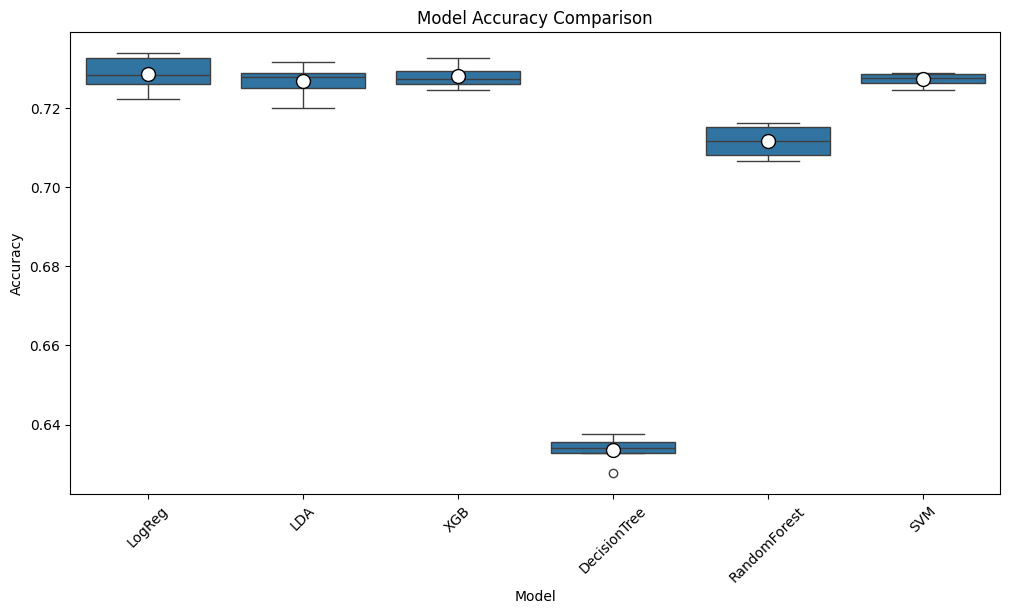

In [44]:
cv_scores_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_lda = cross_val_score(lda, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_xgb_clf = cross_val_score(xgb_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_clf_tree = cross_val_score(clf_tree, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_rf_clf = cross_val_score(rf_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_svm_clf = cross_val_score(svm_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Create a DataFrame
data = {
    'Model': ['LogReg']*len(cv_scores_log_reg) + ['LDA']*len(cv_scores_lda) + ['XGB']*len(cv_scores_xgb_clf) + 
             ['DecisionTree']*len(cv_scores_clf_tree) + ['RandomForest']*len(cv_scores_rf_clf) + ['SVM']*len(cv_scores_svm_clf),
    'Accuracy': np.concatenate([cv_scores_log_reg, cv_scores_lda, cv_scores_xgb_clf, cv_scores_clf_tree, cv_scores_rf_clf, cv_scores_svm_clf])
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Accuracy', data=df, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

For the models above, including logistic regression, linear discriminant analysis, extreme gradient boosting, classification tree, random forest, and support vector machine, We can exclude the dicision tree model because of its obviously lower accuracy compared with all else model. Then, after comprehensively considered confusion matrix, AUC store, log odd, and test dataset accuracy, the logistic regression could be a better choice. 

### Conclusion
After a comprehensive consideration, the logistic regression will be a better choice compared with all other models. Besides a good accuracy while the model was applying to test dataset, this model allows us to have some interpretation about the effect of the variables to the outcome. Further, its type 2 error was NOT greater than else models. Compared with the ensemble models like extreme gradient boosting and random forest, it was much simpler. 

In [45]:
# Add constant to the features. Including a constant can improve the fit of your model by allowing the regression line 
# (or hyperplane in multiple regression) to be optimally positioned within the data space. This can lead to more accurate predictions.
X_train_scaled_with_const = sm.add_constant(X_train)

# Fit the model with statsmodels
model_sm = sm.Logit(y_train, X_train_scaled_with_const).fit(disp=0)

# Get the summary which includes p-values
print(model_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                48076
Model:                          Logit   Df Residuals:                    48061
Method:                           MLE   Df Model:                           14
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.1919
Time:                        23:50:18   Log-Likelihood:                -26927.
converged:                       True   LL-Null:                       -33321.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.3439   5.15e+05  -1.23e-05      1.000   -1.01e+06    1.01e+06
age                        0.0001   4.44e-06     31.250      0.000       0.000       0.000
heig

This summary table provides a snapshot of the model's findings, but careful consideration of the context, data quality, and potential confounding variables is essential for accurate interpretation.

Significant predictors like age, weight, and ap_hi positively influence the likelihood of cardiovascular diseases, meaning increases in these variables are associated with higher odds of the disease. Lifestyle factors such as smoke, alco, and active have negative coefficients, suggesting that, surprisingly, higher values (possibly indicating smoking, alcohol consumption, and physical activity) are associated with lower odds of cardiovascular diseases in this model. However, these interpretations need cautious consideration, given the context and potential confounding factors.

The very large standard errors and non-significant p-values for some variables might indicate data issues or that these variables do not meaningfully contribute to the model in the presence of other variables.

Age: The coefficient 0.0001 means that for each additional day of age, the log odds of having cardiovascular disease increase by 0.0001.

height: The coefficient is -0.0030. This indicates that for each one-unit increase in height (in centimeters), the log odds of having cardiovascular disease decrease by 0.0030. This suggests a negative association between height and the likelihood of having cardiovascular disease, meaning taller individuals might have slightly lower odds of the disease.

weight: The coefficient is 0.0107. This implies that for each one-unit increase in weight (in kilograms), the log odds of having cardiovascular disease increase by 0.0107. This shows a positive association between weight and the likelihood of cardiovascular disease, indicating higher weight is associated with higher odds of the disease.

ap_hi (Systolic blood pressure): The coefficient is 0.0571. For each one-unit increase in systolic blood pressure, the log odds of having cardiovascular disease increase by 0.0571. This significant positive coefficient suggests that higher systolic blood pressure is strongly associated with increased odds of cardiovascular disease.

ap_lo (Diastolic blood pressure): The coefficient is 0.0103. This means that for each one-unit increase in diastolic blood pressure, the log odds of having cardiovascular disease increase by 0.0103. Like systolic blood pressure, this indicates a positive association but with a smaller magnitude.

gender: The coefficient is -0.0340. This suggests that being of a certain gender (depending on how gender is coded, say 1 for males and 0 for females or vice versa) decreases the log odds of having cardiovascular disease by 0.0340.

smoke: The coefficient is -0.1321. This indicates that for smokers (if smoking is coded as 1), the log odds of having cardiovascular disease decrease by 0.1321 compared to non-smokers. This result is somewhat counterintuitive, as smoking is generally associated with higher risks of cardiovascular diseases, highlighting the importance of considering potential confounders and the context of the data.

alco: The coefficient is -0.2537, suggesting that alcohol consumption is associated with lower log odds of having cardiovascular disease by 0.2537. Like smoking, this finding is counterintuitive and warrants a cautious interpretation.

active: The coefficient is -0.2296, indicating that being physically active (if active is coded as 1) is associated with lower log odds of having cardiovascular disease by 0.2296. This finding aligns with common knowledge that physical activity is beneficial for cardiovascular health.

For the other variables, especially those with very large standard errors and p-values of 1.000, their coefficients are likely not reliable due to issues like multicollinearity or insufficient variability in the data for these variables.

### Further Discovery
We could consider extend the work by discovering the latent variable between the outcome and smoke or alcohol for future work.